In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the data
data = pd.read_csv('Attrition data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   Age                      4410 non-null   int64  
 2   Attrition                4410 non-null   object 
 3   BusinessTravel           4410 non-null   object 
 4   Department               4410 non-null   object 
 5   DistanceFromHome         4410 non-null   int64  
 6   Education                4410 non-null   int64  
 7   EducationField           4410 non-null   object 
 8   EmployeeCount            4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [4]:
data.head()

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [5]:
# Consider only necessary columns
columns = ['Age','Attrition','Department','EducationField','Gender','EmployeeCount','YearsAtCompany','JobRole',
           'EnvironmentSatisfaction','JobSatisfaction','WorkLifeBalance','JobInvolvement','PerformanceRating']

data = data[columns]

In [6]:
# Check for null values
data.isnull().sum()

Age                         0
Attrition                   0
Department                  0
EducationField              0
Gender                      0
EmployeeCount               0
YearsAtCompany              0
JobRole                     0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement              0
PerformanceRating           0
dtype: int64

In [7]:
# Fill the null values of all columns
data['EnvironmentSatisfaction'].unique()

array([ 3.,  2.,  4.,  1., nan])

In [8]:
data['JobSatisfaction'].unique()

array([ 4.,  2.,  1.,  3., nan])

In [9]:
data['WorkLifeBalance'].unique()

array([ 2.,  4.,  1.,  3., nan])

Here, NaN represents a satisfaction level of 0, hence, we'll fill the missing entries with 0

In [10]:
data['EnvironmentSatisfaction'].fillna(0,inplace=True)
data['JobSatisfaction'].fillna(0,inplace=True)
data['WorkLifeBalance'].fillna(0,inplace=True)

In [11]:
# Check if all null values are filled
data.isnull().sum()

Age                        0
Attrition                  0
Department                 0
EducationField             0
Gender                     0
EmployeeCount              0
YearsAtCompany             0
JobRole                    0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
JobInvolvement             0
PerformanceRating          0
dtype: int64

In [12]:
# No of employees in the company
print("No of employees in the company:",data['EmployeeCount'].sum())

No of employees in the company: 4410


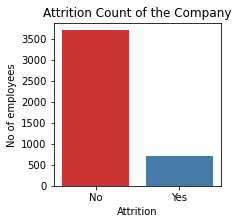

In [13]:
# Attrition rate of the company
plt.figure(figsize=(3,3))
data['Attrition'].value_counts()
sns.countplot(x = data['Attrition'],palette='Set1')
plt.title('Attrition Count of the Company')
plt.ylabel('No of employees')
plt.show()

More than 10% of the employees who worked in the company have exited

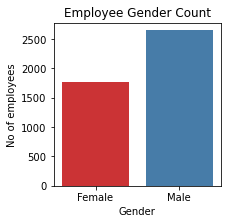

In [14]:
# No of men & women who work at the company
plt.figure(figsize=(3,3))
data['Gender'].value_counts()
sns.countplot(x = data['Gender'],palette='Set1')
plt.title('Employee Gender Count')
plt.ylabel('No of employees')
plt.show()

60% of employees of the company are male & the rest 40% are female employees

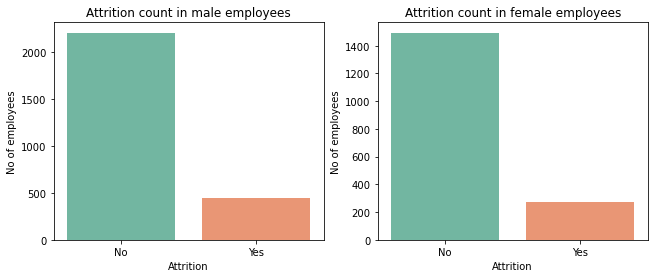

In [15]:
# Attrition rate based on gender
gender_attr = data.groupby('Gender')
male_data = gender_attr.get_group('Male')
female_data = gender_attr.get_group('Female')

plt.subplot(1,2,1)
sns.countplot(x = male_data['Attrition'],palette='Set2')
plt.title('Attrition count in male employees')
plt.ylabel('No of employees')

plt.subplot(1,2,2)
sns.countplot(x = female_data['Attrition'],palette='Set2')
plt.title('Attrition count in female employees')
plt.ylabel('No of employees')

plt.subplots_adjust(right = 1.5)
plt.show()

Approximately 20% of male employees & 15% of female employees have exited the company

In [16]:
# Separating employees based on department
dept_attr = data.groupby('Department')

hr_data = dept_attr.get_group('Human Resources')
rd_data = dept_attr.get_group('Research & Development')
sales_data = dept_attr.get_group('Sales')

Department wise Attrition Rate


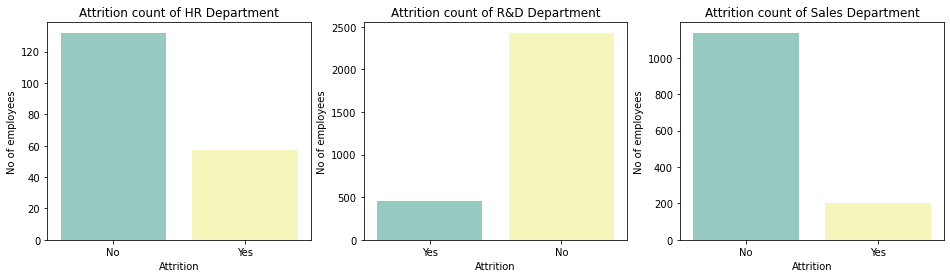

In [17]:
# Department wise attrition rate

print("Department wise Attrition Rate")

plt.subplot(1,3,1)
sns.countplot(x = hr_data['Attrition'],palette='Set3')
plt.title('Attrition count of HR Department')
plt.ylabel('No of employees')

plt.subplot(1,3,2)
sns.countplot(x = rd_data['Attrition'],palette='Set3')
plt.title('Attrition count of R&D Department')
plt.ylabel('No of employees')

plt.subplot(1,3,3)
sns.countplot(x = sales_data['Attrition'],palette='Set3')
plt.title('Attrition count of Sales Department')
plt.ylabel('No of employees')

plt.subplots_adjust(right=2.2)
plt.show()

Close to 30% of employees who work at HR Dept, 10% of employees who work for R&D Dept, 18% of Sales Dept employees have exited the company 

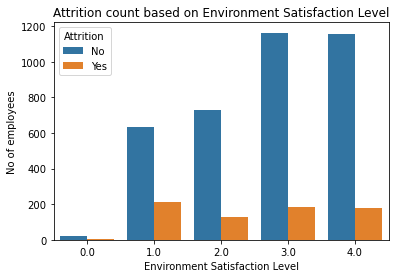

In [18]:
# Attrition rate based on environment satisfaction
sns.countplot(x = data['EnvironmentSatisfaction'], hue = data['Attrition'])
plt.title('Attrition count based on Environment Satisfaction Level')
plt.ylabel('No of employees')
plt.xlabel('Environment Satisfaction Level')
plt.show()

Proportion of employees who found the company environment to be unsatisfactory(1.0) & quit is more when compared to other employees

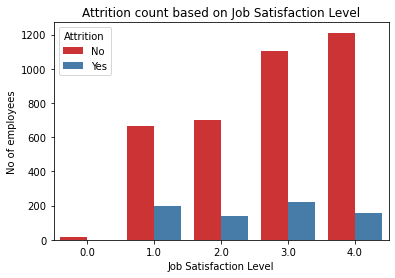

In [19]:
# Attrition rate based on job satisfaction
sns.countplot(x = data['JobSatisfaction'], hue = data['Attrition'],palette='Set1')
plt.title('Attrition count based on Job Satisfaction Level')
plt.ylabel('No of employees')
plt.xlabel('Job Satisfaction Level')
plt.show()

Proportion of employees who found their job unsatisfactory(1.0) & quit is more when compared to other employees

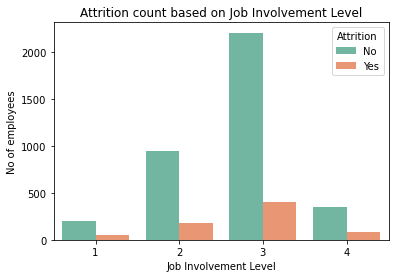

In [20]:
# Attrition rate based on Job Involvement
sns.countplot(x = data['JobInvolvement'], hue = data['Attrition'],palette='Set2')
plt.title('Attrition count based on Job Involvement Level')
plt.ylabel('No of employees')
plt.xlabel('Job Involvement Level')
plt.show()

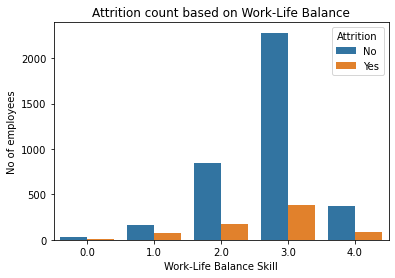

In [21]:
# Attrition rate based on work-life balance 
sns.countplot(x = data['WorkLifeBalance'], hue = data['Attrition'])
plt.title('Attrition count based on Work-Life Balance')
plt.ylabel('No of employees')
plt.xlabel('Work-Life Balance Skill')
plt.show()

In [22]:
# Writing to a new csv file
data.to_csv('Employee Attrition.csv')